<a href="https://colab.research.google.com/github/darkfrozen158/01MIAR_04_A_2025-2026-/blob/main/ACTIVIDAD_DATASET/01MIAR_ACTIVIDAD_DATASET_CRISTIAN_LEONARDO_CHAVEZ_TRELLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**01MIAR - Actividad Dataset**

**Asignatura: 01MIAR - Python para la inteligencia artificial**

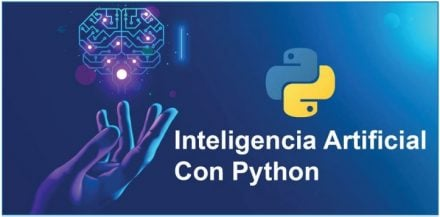

**Nombres y Apellidos: CRISTIAN LEONARDO CHAVEZ TRELLES**

**RUTA DE GITHUB: https://github.com/darkfrozen158/03MIAR_04_A_2025-2026**

**1.Introducción**

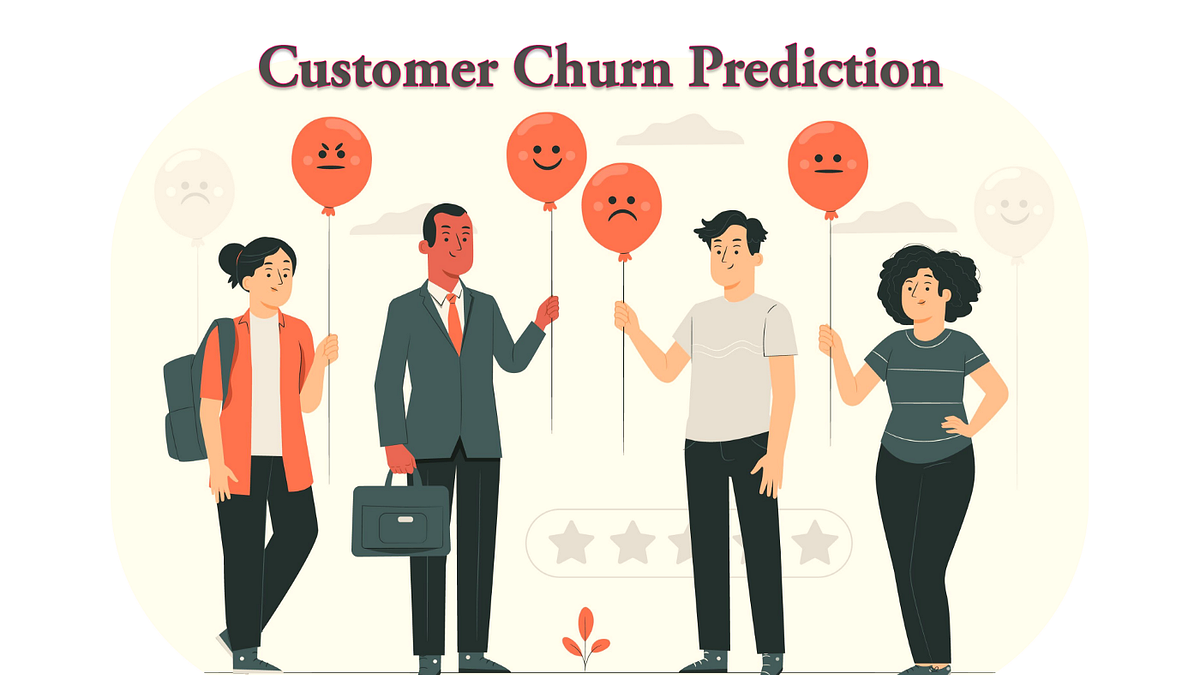

El dataset Churn Bank Customer proveniente de KAGGLE contiene información de clientes de un banco que opera en los paises de FRANCIA, ESPAÑA y ALEMANIA.

Cada registro representa un cliente con 13 variables que capturan características demográficas, financieras y de interacción con el banco.

URL KAGGLE : https://www.kaggle.com/datasets/kartiksaini18/churn-bank-customer?select=Churn_Modelling.csv

A.   Variables demográficas:

*   PAIS: País del cliente (Francia, España, Alemania).

*   GENERO: Género (Male/Female).

*   EDAD: Edad del cliente.

B.  Variables financieras:

*  SCORE_CREDITICIO: Puntuación de crédito (0-850).

*  BALANCE: Saldo en la cuenta.

*  SALARIO_ESTIMADO: Ingreso anual estimado.

C.  Variables de productos/servicios:

*  CANTIDAD_PRODUCTOS: Número de productos contratados (1-4).

*  TARJETA_CREDITO?: Si posee tarjeta (0=No, 1=Sí).

*  MIEMBRO_ACTIVO?: Si es miembro activo (0=No, 1=Sí)

D. Variable objetivo:

*  FUGA_CLIENTE?: Indica si el cliente se fue (1) o no (0).

**2.Objetivos del proyecto:**

1.   Aplicar diferentes técnicas de tratamiento de datos aplicadas al dataset de Churn_Modelling.

2.   Explorar datos y evaluarlos mediante el uso de Pandas.

3.   Aplicar adecuadamente técnicas de visualización utilizando seaborn y matplotlib.

4.   Desarrollar una modelo analitico utilizando 3 modelos de clasificación como:


*  Regresión Logistica
*  Random Forest
*  XGBoost

Para determinar cual tiene un mejor score de aceptación al momento de detectar la fuga de clientes.

**3.DESARROLLO DEL PROYECTO:**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import kagglehub
import numpy as np

In [4]:
#Descargamos el archivo de KAGGLE utilizando su libreria.
path = kagglehub.dataset_download("kartiksaini18/churn-bank-customer")
print("Ruta de archivos descargados de KAGGLE:", path)

Ruta de archivos descargados de KAGGLE: /kaggle/input/churn-bank-customer


In [5]:
#Contruimos la ruta final donde estara el archivo.
ruta_final = path + "/Churn_Modelling.csv"
print(ruta_final)

/kaggle/input/churn-bank-customer/Churn_Modelling.csv


In [74]:
#Leemos el archivo y lo convertimos en un dataframe.
df = pd.read_csv(ruta_final)

In [75]:
#visualizamos los primeros 10 registros.
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


**3.1 TRANSFORMACIÓN DE COLUMNAS:**

In [76]:
#Como podemos observar las columnas se encuentran en el idioma ingles, lo que realizaremos es convertilas a español para una mejor comprensión.
nuevas_columnas = ['CONTEO_FILA','CODIGO_CLIENTE','APELLIDO_CLIENTE','SCORE_CREDITICIO','PAIS','GENERO','EDAD','PLAZO','BALANCE','CANTIDAD_PRODUCTOS','TARJETA_CREDITO?','MIEMBRO_ACTIVO?','SALARIO_ESTIMADO','FUGA_CLIENTE?']
nuevas_columnas

['CONTEO_FILA',
 'CODIGO_CLIENTE',
 'APELLIDO_CLIENTE',
 'SCORE_CREDITICIO',
 'PAIS',
 'GENERO',
 'EDAD',
 'PLAZO',
 'BALANCE',
 'CANTIDAD_PRODUCTOS',
 'TARJETA_CREDITO?',
 'MIEMBRO_ACTIVO?',
 'SALARIO_ESTIMADO',
 'FUGA_CLIENTE?']

In [77]:
#Cambiamos de nombre a la columnas.
df.columns = nuevas_columnas

In [81]:
#visualizamos nuevamente los primeros 10 registros y observamos que los nombres de las columnas han cambiado.
df.head(10)

,CONTEO_FILA,CODIGO_CLIENTE,APELLIDO_CLIENTE,SCORE_CREDITICIO,PAIS,GENERO,EDAD,PLAZO,BALANCE,CANTIDAD_PRODUCTOS,TARJETA_CREDITO?,MIEMBRO_ACTIVO?,SALARIO_ESTIMADO,FUGA_CLIENTE?
0,1,15634602,Hargrave,619,FRANCIA,FEMENINO,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,ESPAÑA,FEMENINO,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,FRANCIA,FEMENINO,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,FRANCIA,FEMENINO,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,ESPAÑA,FEMENINO,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,ESPAÑA,MASCULINO,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,FRANCIA,MASCULINO,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,ALEMANIA,FEMENINO,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,FRANCIA,MASCULINO,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,FRANCIA,MASCULINO,27,2,134603.88,1,1,1,71725.73,0


In [79]:
#Transformamos la columna GENERO
df['GENERO'] = df['GENERO'].replace({'Female': 'FEMENINO', 'Male': 'MASCULINO'})

In [80]:
#Transformamos la columna PAIS
df['PAIS'] = df['PAIS'].replace({'France': 'FRANCIA', 'Spain': 'ESPAÑA', 'Germany': 'ALEMANIA'})

**3.2ANALISIS EXPLORATORIO DE DATOS:**

**A) PREVIO EXPLORACIÓN DE DATOS MEDIANTE FUNCIONES**

In [82]:
#Visualizamos el tamaño del dataframe
print("Cantidad de Filas del Dataset: {} ". format(df.shape[0]))
print("Cantidad de Columnas del Dataset : {} ". format(df.shape[1]))

Cantidad de Filas del Dataset: 10000 
Cantidad de Columnas del Dataset : 14 


In [16]:
#Información del las columnas:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CONTEO_FILA         10000 non-null  int64  
 1   CODIGO_CLIENTE      10000 non-null  int64  
 2   APELLIDO_CLIENTE    10000 non-null  object 
 3   SCORE_CREDITICIO    10000 non-null  int64  
 4   PAIS                10000 non-null  object 
 5   GENERO              10000 non-null  object 
 6   EDAD                10000 non-null  int64  
 7   PLAZO               10000 non-null  int64  
 8   BALANCE             10000 non-null  float64
 9   CANTIDAD_PRODUCTOS  10000 non-null  int64  
 10  TARJETA_CREDITO?    10000 non-null  int64  
 11  MIEMBRO_ACTIVO?     10000 non-null  int64  
 12  SALARIO_ESTIMADO    10000 non-null  float64
 13  FUGA_CLIENTE?       10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
#Tipo de columnas del Dataset:
df.dtypes

,0
CONTEO_FILA,int64
CODIGO_CLIENTE,int64
APELLIDO_CLIENTE,object
SCORE_CREDITICIO,int64
PAIS,object
GENERO,object
EDAD,int64
PLAZO,int64
BALANCE,float64
CANTIDAD_PRODUCTOS,int64


In [19]:
#Descripción de las principales metricas Estadisticas del Dataset :
df.describe()

,CONTEO_FILA,CODIGO_CLIENTE,SCORE_CREDITICIO,EDAD,PLAZO,BALANCE,CANTIDAD_PRODUCTOS,TARJETA_CREDITO?,MIEMBRO_ACTIVO?,SALARIO_ESTIMADO,FUGA_CLIENTE?
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [92]:
print("SALARIO ESTIMADO MINIMO: {} ". format(df['SALARIO_ESTIMADO'].min()))
print("SALARIO ESTIMADO MAXIMO: {} ". format(df['SALARIO_ESTIMADO'].max()))
print("SALARIO ESTIMADO SU MEDIA ES: {} ". format(df['SALARIO_ESTIMADO'].mean()))

SALARIO ESTIMADO MINIMO: 11.58 
SALARIO ESTIMADO MAXIMO: 199992.48 
SALARIO ESTIMADO SU MEDIA ES: 100090.239881 


In [94]:
print("BALANCE MINIMO: {} ". format(df['BALANCE'].min()))
print("BALANCE MAXIMO: {} ". format(df['BALANCE'].max()))
print("DEL BALANCE SU MEDIA ES: {} ". format(df['BALANCE'].mean()))

BALANCE MINIMO: 0.0 
BALANCE MAXIMO: 250898.09 
DEL BALANCE SU MEDIA ES: 76485.889288 


In [21]:
#Cantidad de Nullos en el dataset:
df.isnull().sum()

,0
CONTEO_FILA,0
CODIGO_CLIENTE,0
APELLIDO_CLIENTE,0
SCORE_CREDITICIO,0
PAIS,0
GENERO,0
EDAD,0
PLAZO,0
BALANCE,0
CANTIDAD_PRODUCTOS,0


In [83]:
#Visualización de cantidad de clientes por País :
df['PAIS'].value_counts()

,count
PAIS,
FRANCIA,5014
ALEMANIA,2509
ESPAÑA,2477


In [84]:
#Visualización de cantidad de clientes por Genero :
df['GENERO'].value_counts()

,count
GENERO,
MASCULINO,5457
FEMENINO,4543


In [24]:
#Visualización de cantidad de clientes por Cantidad de Productos:
df['CANTIDAD_PRODUCTOS'].value_counts()

,count
CANTIDAD_PRODUCTOS,
1,5084
2,4590
3,266
4,60


**B) EXPLORACIÓN DE DATOS MEDIANTE GRAFICOS:**

**1. Distribución de Edad por Género:**

Text(0, 0.5, 'Frecuencia')

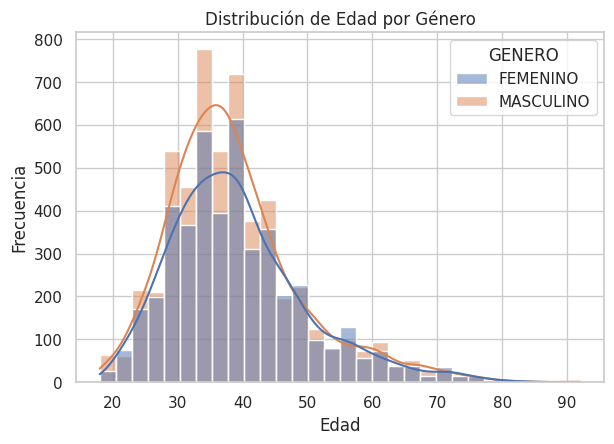

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='EDAD', hue='GENERO', kde=True, bins=30)
plt.title('Distribución de Edad por Género')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

**2. Distribución de Churn por País:**

Text(0, 0.5, 'Cantidad de Clientes')

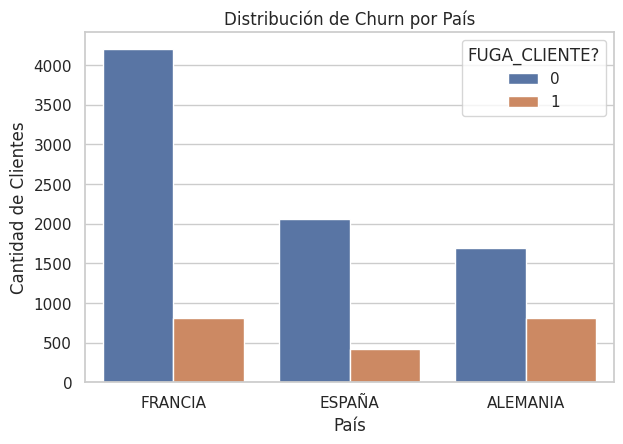

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='PAIS', hue='FUGA_CLIENTE?')
plt.title('Distribución de Churn por País')
plt.xlabel('País')
plt.ylabel('Cantidad de Clientes')

**3.Comparativo de Balance vs Salario Estimado con Churn:**

Text(0, 0.5, 'Salario Estimado')

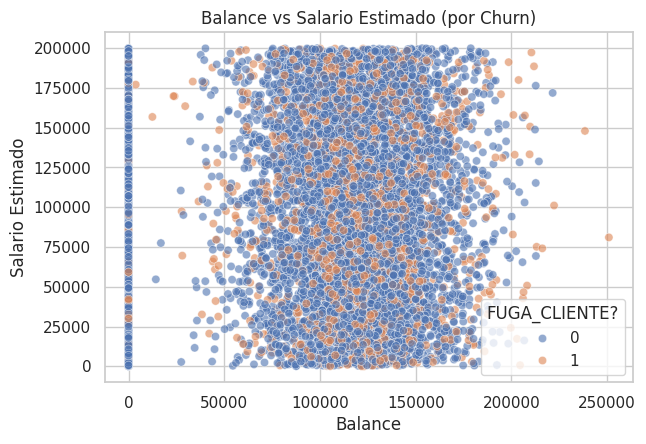

In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='BALANCE', y='SALARIO_ESTIMADO', hue='FUGA_CLIENTE?', alpha=0.6)
plt.title('Balance vs Salario Estimado (por Churn)')
plt.xlabel('Balance')
plt.ylabel('Salario Estimado')

**4. Correlación entre variables numéricas:**

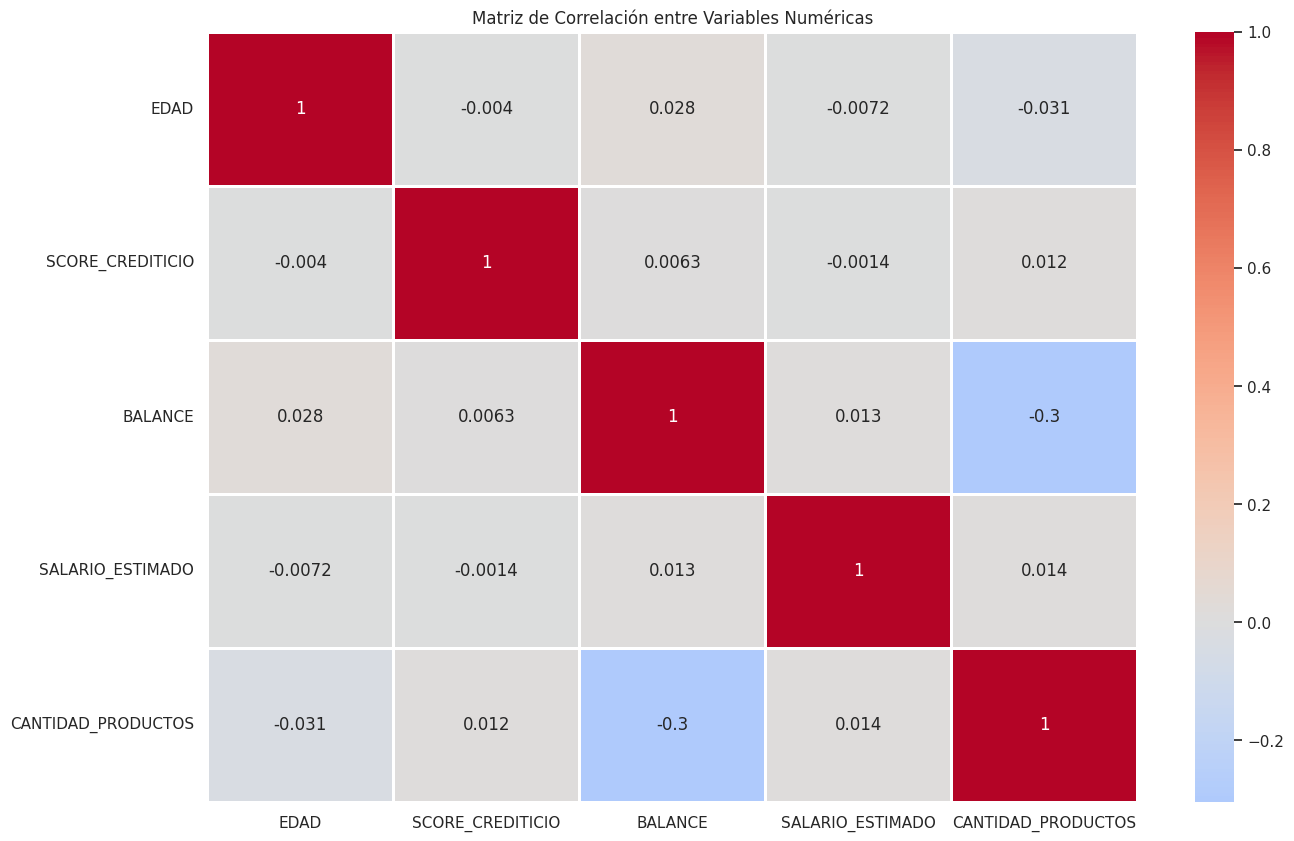

In [40]:
plt.figure(figsize=(15, 10))
numeric_cols = ['EDAD', 'SCORE_CREDITICIO', 'BALANCE', 'SALARIO_ESTIMADO', 'CANTIDAD_PRODUCTOS']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, linewidth=0.80)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

**5.Distribución de Salario Estimado por Churn:**

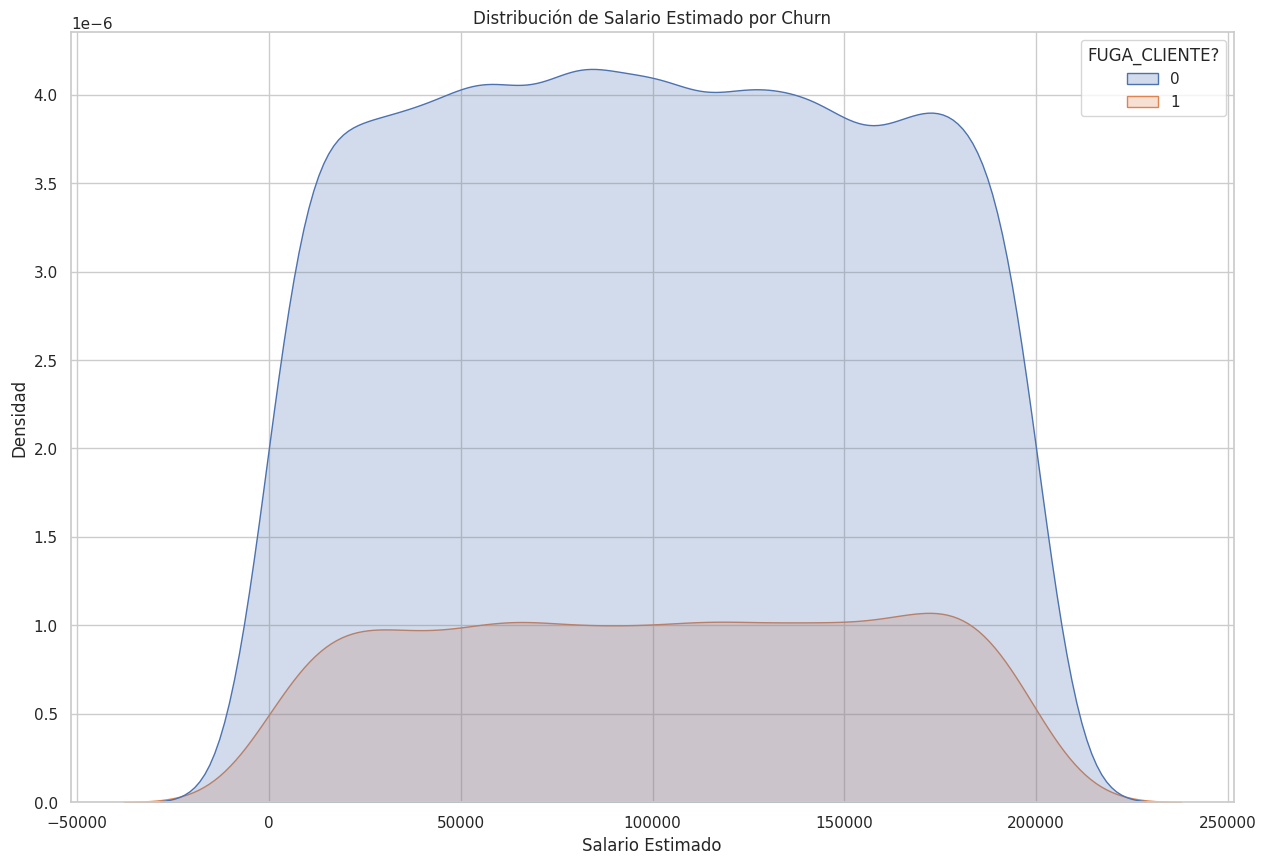

In [43]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df, x='SALARIO_ESTIMADO', hue='FUGA_CLIENTE?', fill=True)
plt.title('Distribución de Salario Estimado por Churn')
plt.xlabel('Salario Estimado')
plt.ylabel('Densidad')
plt.show()

**6. Proporción de Churn por Tarjeta de Crédito:**

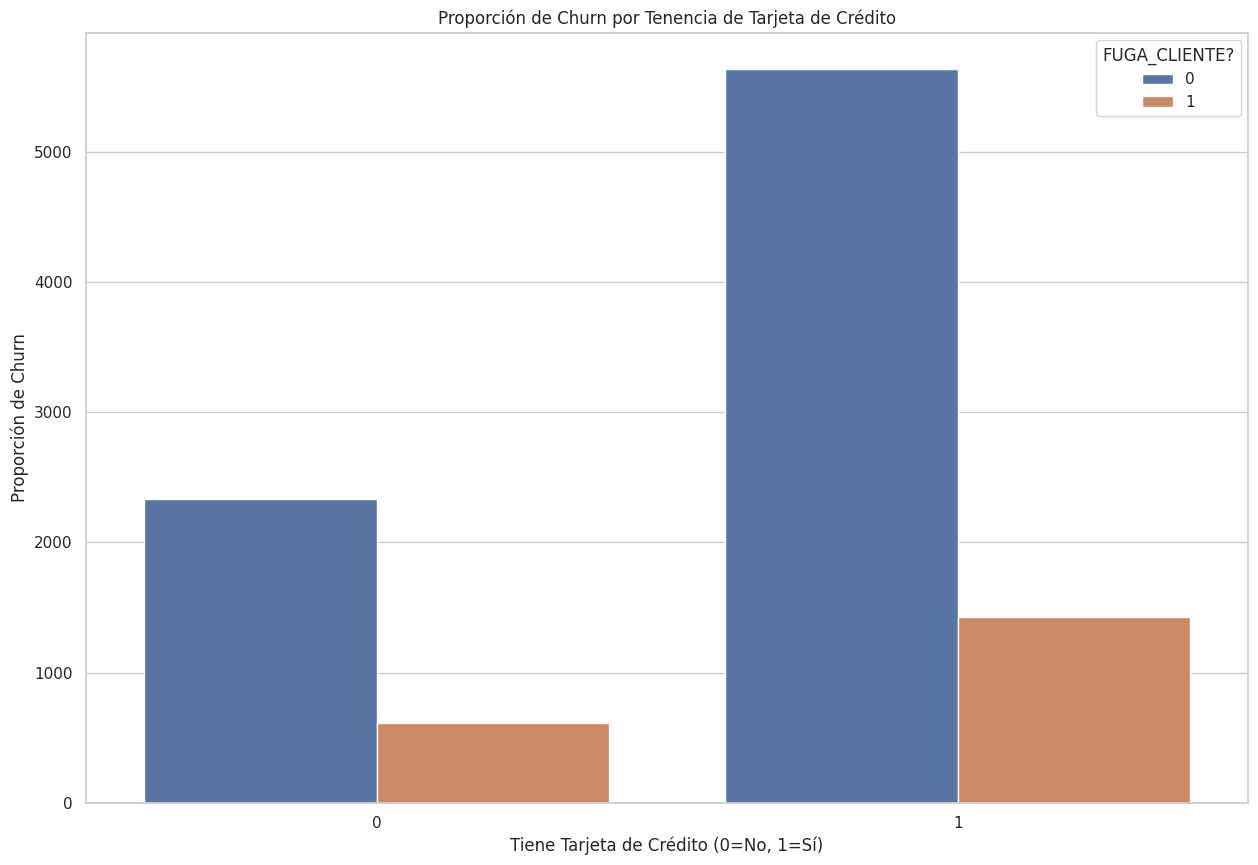

In [64]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='TARJETA_CREDITO?', hue='FUGA_CLIENTE?')
plt.title('Proporción de Churn por Tenencia de Tarjeta de Crédito')
plt.xlabel('Tiene Tarjeta de Crédito (0=No, 1=Sí)')
plt.ylabel('Proporción de Churn')
plt.show()

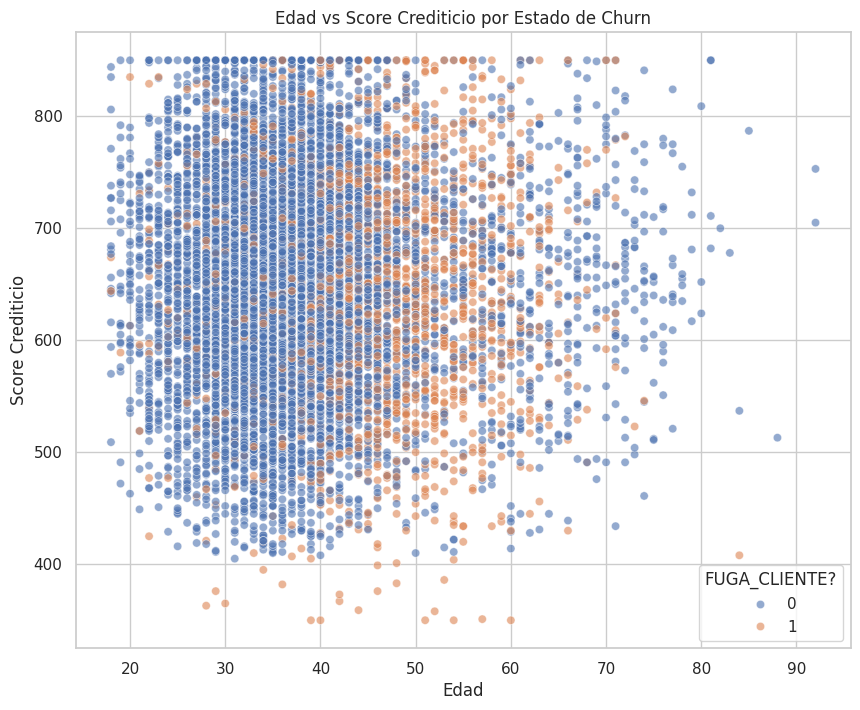

In [65]:
## 10. Edad vs Score Crediticio por Churn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='EDAD', y='SCORE_CREDITICIO', hue='FUGA_CLIENTE?', alpha=0.6)
plt.title('Edad vs Score Crediticio por Estado de Churn')
plt.xlabel('Edad')
plt.ylabel('Score Crediticio')
plt.show()

In [ ]:
# 2. Eliminar columnas no predictivas
df_model = df.drop(['CONTEO_FILA', 'CODIGO_CLIENTE', 'APELLIDO_CLIENTE'], axis=1)

In [ ]:
# 3. Codificar variables categóricas
df_model = pd.get_dummies(df_model, columns=['PAIS', 'GENERO'], drop_first=True)

In [ ]:
# 4. Separar variables (X) y target (y)
X = df_model.drop('FUGA_CLIENTE?', axis=1)
y = df_model['FUGA_CLIENTE?']

In [ ]:
# 5. Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Escalar variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:04:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


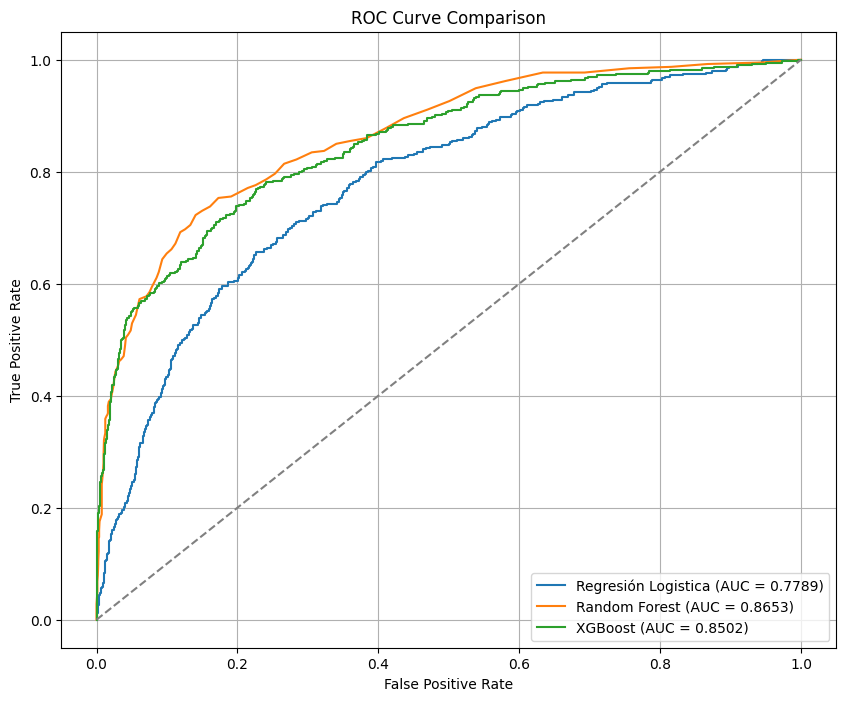

Evalución de Resultados de Modelos...
Regresión Logistica:
  Accuracy: 0.8110
  AUC: 0.7789

Random Forest:
  Accuracy: 0.8665
  AUC: 0.8653

XGBoost:
  Accuracy: 0.8695
  AUC: 0.8502



In [14]:
# 7. Inicializar modelos
models = {
    'Regresión Logistica': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 8. Entrenar, predecir y evaluar cada modelo
results = {}

plt.figure(figsize=(10,8))
for name, model in models.items():
    # Entrenar
    model.fit(X_train_scaled, y_train)

    # Predicciones
    y_pred = model.predict(X_test_scaled)
    y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

    # Accuracy y AUC
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    results[name] = {'Accuracy': acc, 'AUC': auc}

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.4f})')

# Gráfico ROC
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 9. Mostrar resultados
print("Evalución de Resultados de Modelos...")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print()
